Data Preprocessing

In [98]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
# Load the dataset
file_path = 'Data_Cortex_Nuclear.csv'
data = pd.read_csv(file_path)

In [100]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
  MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0   309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1   309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2   309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3   309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4   309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   

    pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0  0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1  0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2  0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3  0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4  0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   

     EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0  0.131790  0.128186  1

In [101]:
# Display dataset information
print("\nDataset information:")
print(data.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float

In [102]:
# Remove unwanted columns
data.drop(columns=['MouseID'], inplace=True)

In [103]:
# Handling Missing Values
# Impute missing values with the mean for columns with fewer missing values
for column in data.columns:
    if data[column].isnull().sum() > 0:
        if data[column].isnull().sum() <= 10:  # Arbitrary threshold for small number of missing values
            data[column].fillna(data[column].mean(), inplace=True)

In [104]:
# Columns with significant missing values
columns_with_missing_values = ['ELK_N', 'Bcatenin_N', 'BAD_N', 'BCL2_N', 'pCFOS_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N']


In [105]:
# Initialize KNN imputer
imputer = KNNImputer(n_neighbors=5)

In [106]:
# Impute missing values using KNN imputer
data[columns_with_missing_values] = imputer.fit_transform(data[columns_with_missing_values])


In [107]:
# Check if all missing values are handled
remaining_missing_values_after_knn = data.isnull().sum()
print("\nRemaining missing values after KNN imputation:")
print(remaining_missing_values_after_knn[remaining_missing_values_after_knn > 0])



Remaining missing values after KNN imputation:
Series([], dtype: int64)


In [108]:
# Normalization/Scaling
# Initialize the scaler
scaler = MinMaxScaler()

In [109]:
# Scale the protein expression levels (excluding categorical columns)
protein_columns = data.columns[:-4]  # Exclude 'Genotype', 'Treatment', 'Behavior', 'class'
data[protein_columns] = scaler.fit_transform(data[protein_columns])


In [110]:
# Encoding Categorical Variables
# Initialize the label encoder
label_encoder = LabelEncoder()


In [111]:
# Encode 'Genotype', 'Treatment', 'Behavior', and 'class'
categorical_columns = ['Genotype', 'Treatment', 'Behavior', 'class']
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

In [112]:
# Save the preprocessed dataset to a new CSV file
preprocessed_file_path = 'Preprocessed_mouse.csv'
data.to_csv(preprocessed_file_path, index=False)

In [113]:
print("Preprocessing completed. Preprocessed dataset saved as 'Preprocessed_mouse.csv'.")


Preprocessing completed. Preprocessed dataset saved as 'Preprocessed_mouse.csv'.


In [114]:
# Summary Statistics
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
          DYRK1A_N      ITSN1_N       BDNF_N        NR1_N       NR2A_N  \
count  1080.000000  1080.000000  1080.000000  1080.000000  1080.000000   
mean      0.118296     0.157699     0.533818     0.398234     0.312289   
std       0.105024     0.106601     0.129103     0.142908     0.138147   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.060242     0.096852     0.451515     0.300115     0.210933   
50%       0.093298     0.136175     0.527572     0.398234     0.300335   
75%       0.144345     0.191805     0.609609     0.493324     0.398452   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

            pAKT_N      pBRAF_N    pCAMKII_N      pCREB_N       pELK_N  ...  \
count  1080.000000  1080.000000  1080.000000  1080.000000  1080.000000  ...   
mean      0.357140     0.465586     0.358347     0.515739     0.175861  ...   
std       0.087380     0.106727     0.211332     0.168230     0.082025  ...

EDA 

In [115]:
# Import necessary libraries for EDA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [116]:
# Load the preprocessed dataset
data = pd.read_csv('Preprocessed_mouse.csv')

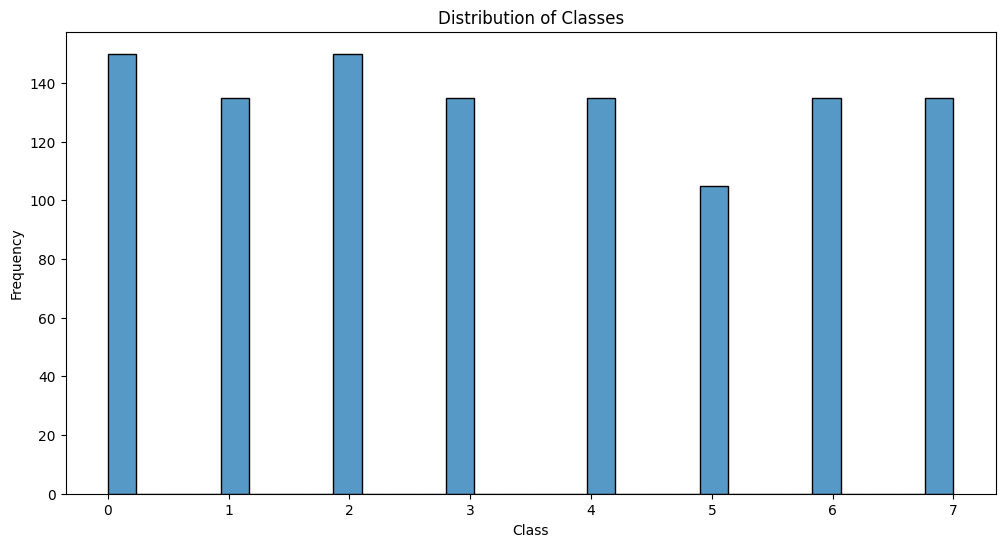

In [117]:
# Visualizations
# Distribution of classes
plt.figure(figsize=(12, 6))
sns.histplot(data['class'], kde=False, bins=30)
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

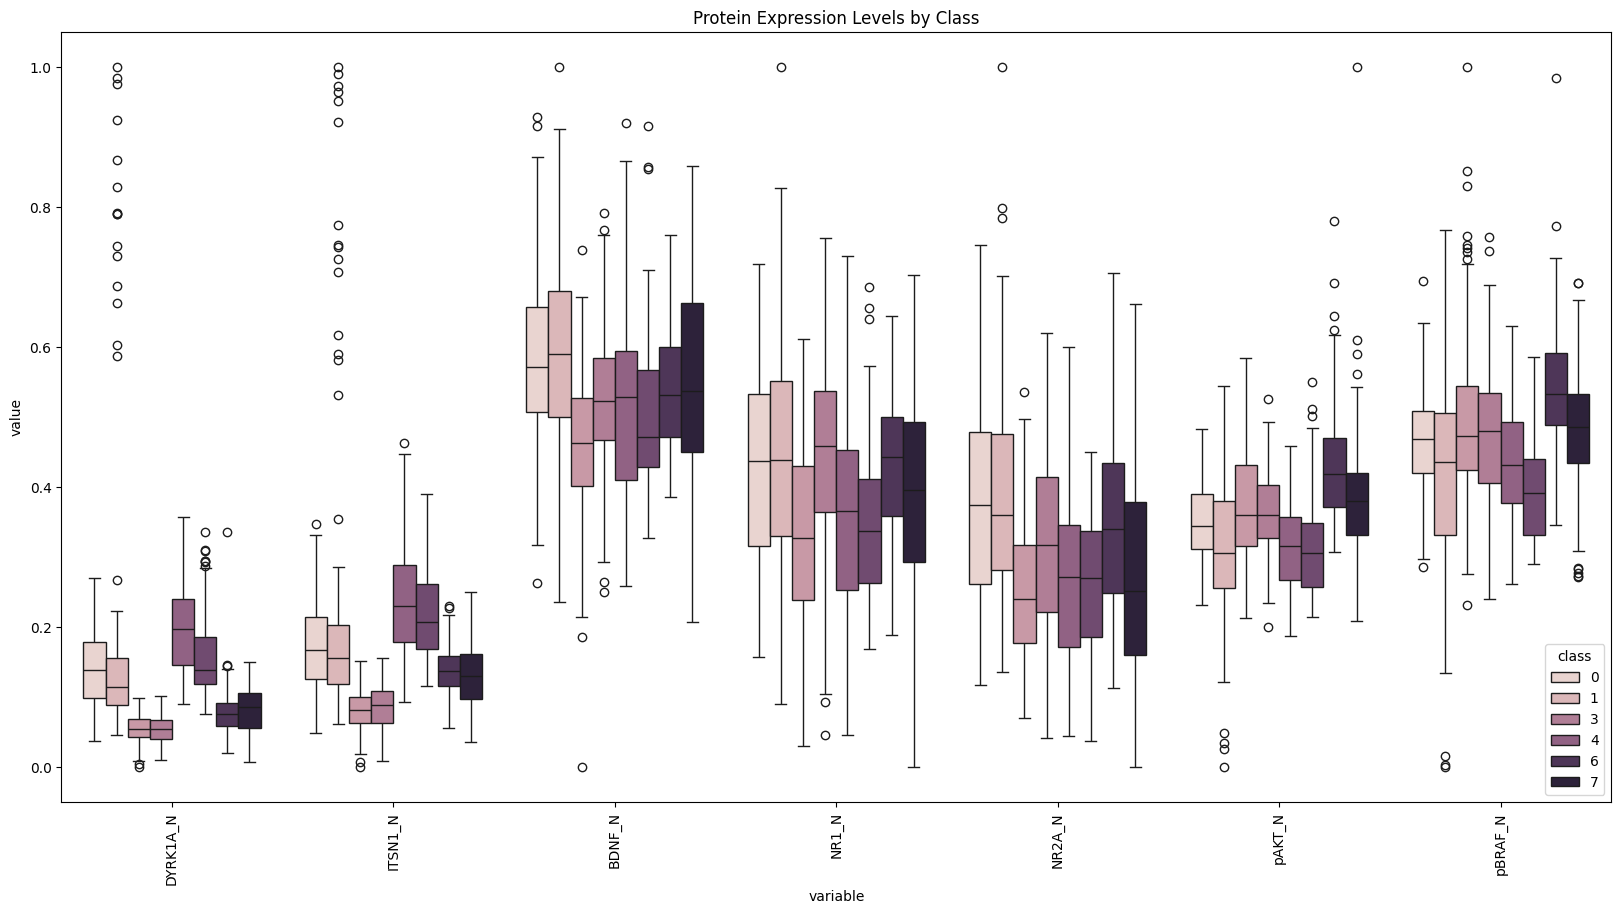

In [118]:
# Boxplot for protein expression levels by class
plt.figure(figsize=(20, 10))
sns.boxplot(data=data.melt(id_vars='class', value_vars=protein_columns[:7]), x='variable', y='value', hue='class')
plt.title('Protein Expression Levels by Class')
plt.xticks(rotation=90)
plt.show()

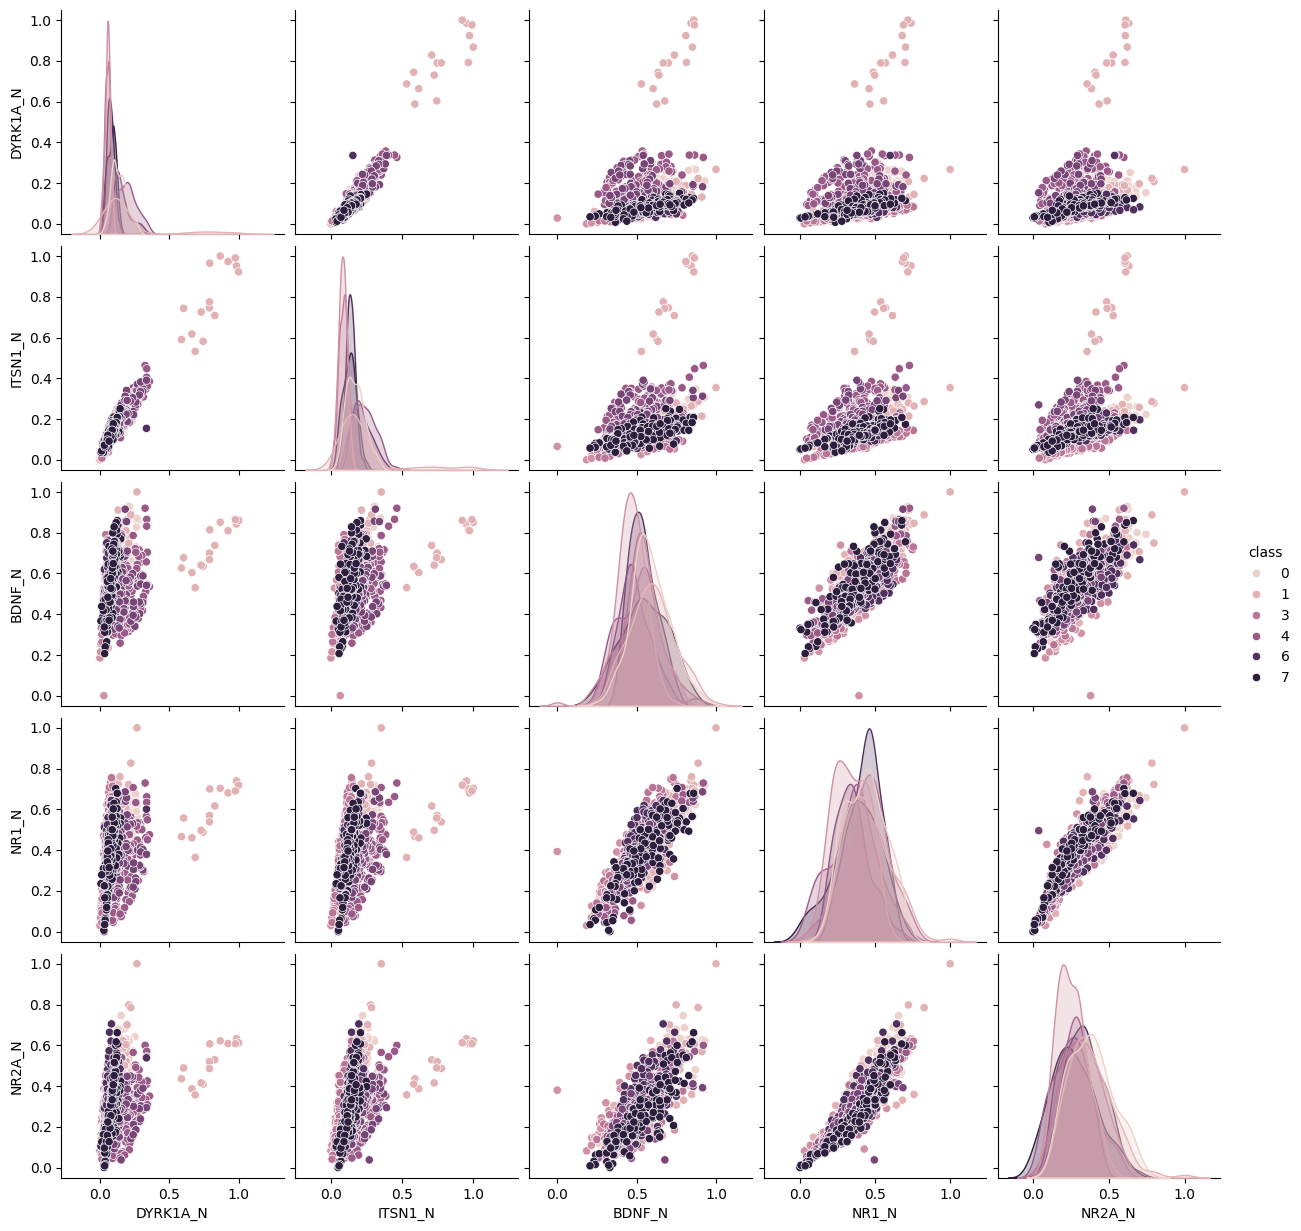

In [119]:
# Pairplot to see relationships between proteins and classes
sns.pairplot(data, hue='class', vars=protein_columns[:5])  # Limiting to first 5 proteins for simplicity
plt.show()

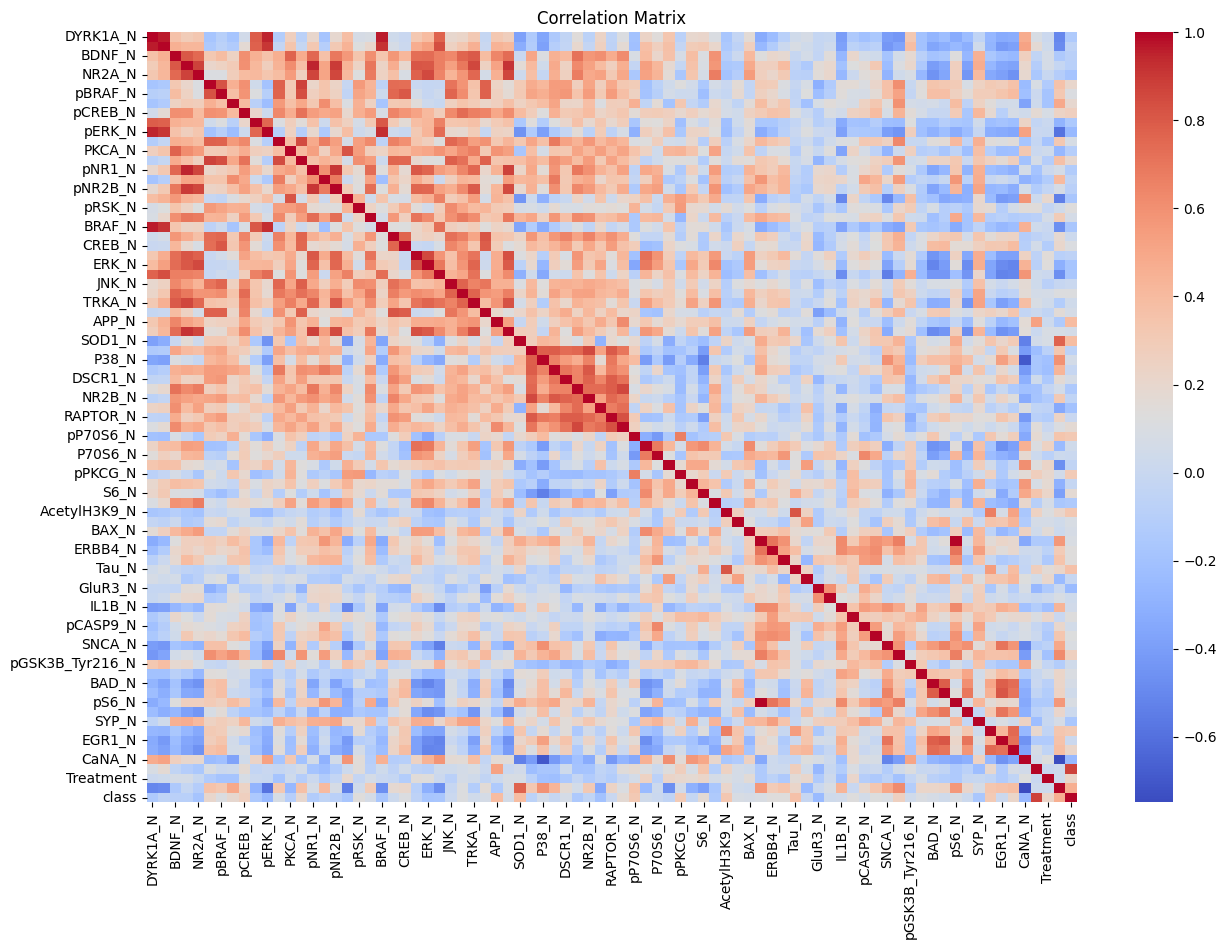

In [120]:
# Correlation Analysis
plt.figure(figsize=(15, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Feature Selection

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

In [122]:
data=pd.read_csv('Preprocessed_mouse.csv')
# Separate features and target variable
X = data.drop(columns=['class'])
y = data['class']

In [123]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [124]:
# Apply PCA
pca = PCA(n_components=0.95)  # retain 95% of variance
X_pca = pca.fit_transform(X_scaled)

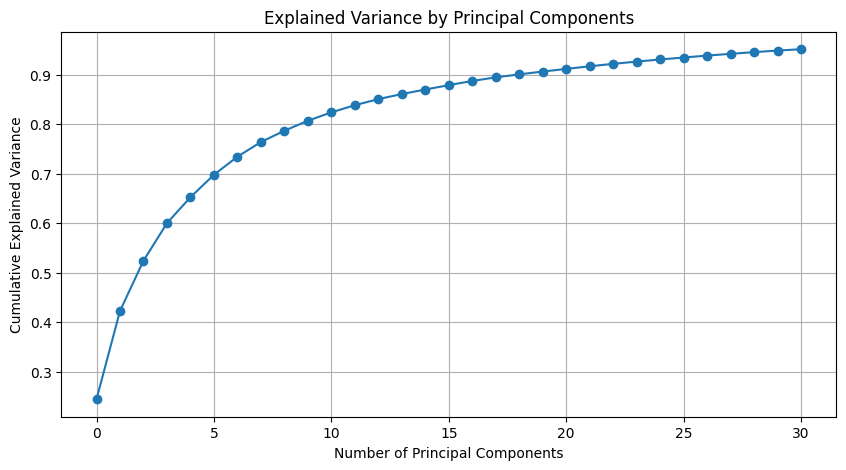

In [125]:
# Plot the explained variance ratio
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

In [126]:
# Create a DataFrame with the principal components
pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
X_pca_df = pd.DataFrame(X_pca, columns=pca_columns)
X_pca_df['class'] = y

In [127]:
# Save the dataset with principal components
selected_data_file_path = 'selected_mouse.csv'
X_pca_df.to_csv(selected_data_file_path, index=False)

In [128]:
print("Feature selection with PCA completed. Dataset with principal components saved as 'Selected_mouse.csv'.")


Feature selection with PCA completed. Dataset with principal components saved as 'Selected_mouse.csv'.


Model Training

In [129]:
# Import necessary libraries for model training and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import joblib

# Load the preprocessed dataset with PCA components
data = pd.read_csv('selected_mouse.csv')

In [130]:
X = data.drop(columns=['class'])
y = data['class']

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [132]:
rf_model = RandomForestClassifier(random_state=42)


In [133]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [134]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [135]:
# Best parameters from Grid Search
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [136]:
# Train the model with the best parameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=2, n_estimators=200, random_state=42)

In [137]:
# Predictions
y_pred = best_rf.predict(X_test)

In [138]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [139]:

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9907
Precision: 0.9908
Recall: 0.9907
F1 Score: 0.9907


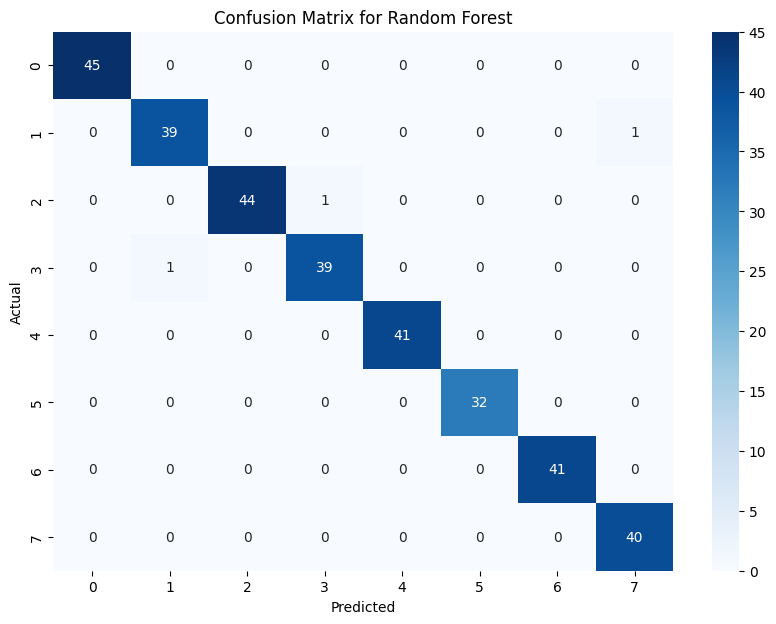

In [140]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [141]:
# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report for Random Forest:")
print(class_report)


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.97      0.97      0.97        40
           2       1.00      0.98      0.99        45
           3       0.97      0.97      0.97        40
           4       1.00      1.00      1.00        41
           5       1.00      1.00      1.00        32
           6       1.00      1.00      1.00        41
           7       0.98      1.00      0.99        40

    accuracy                           0.99       324
   macro avg       0.99      0.99      0.99       324
weighted avg       0.99      0.99      0.99       324

